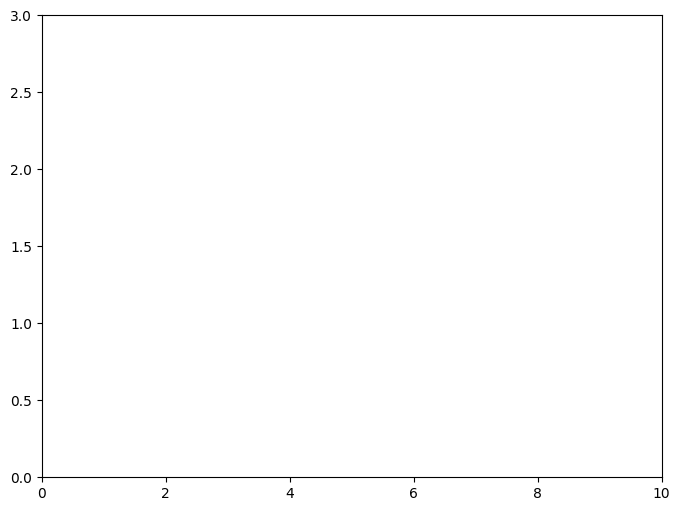

/home/valdinei/.cache/pypoetry/virtualenvs/ploty-test-lAlvNVrF-py3.10/lib64/python3.10/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [9]:
%matplotlib inline
import datetime
from time import sleep
import plotly.express as px
from matplotlib import pyplot, animation
import pandas

dicts = [
    dict(Task="A", Start=0, End=4, Time=4),
    dict(Task="B", Start=4, End=8, Time=4),
    dict(Task="C", Start=8, End=10, Time=2),
]
time = 0


def get_range_list(start, end, last):
    for i in range(last):
        if i <= start:
            yield start
        elif i <= end:
            yield i
        else:
            yield end

    # lst = [i if i < end else end for i in range(start, end)]
    # return lst


def get_index(i, start, end):
    if i <= start:
        return i
    elif i <= end:
        return i
    else:
        return end


def animate(i):
    global time
    params = []
    left = list(map(lambda x: x.get('Start'), dicts))

    for dic in dicts:
        if time < dic.get('Start'):
            params.append(dic.get('Start'))
        elif time <= dic.get('End'):
            params.append(time)
        else:
            params.append(dic.get('Time'))

    time += 1

    pyplot.barh([dic.get('Task') for dic in dicts], params, left=left, color="blue")


def main():
    df = pandas.DataFrame(dicts)

    # project start date
    proj_start = df.Start.min()
    proj_end = df.End.max()
    # number of days from project start to task start
    df['start_num'] = df.Start - proj_start
    # number of days from project start to end of tasks
    df['end_num'] = df.End - proj_start
    # days between start and end of each task
    df['start_to_end'] = df.end_num - df.start_num

    # fig, ax = pyplot.subplots()
    # res = ax.barh(df.Task, df.start_to_end, left=df.start_num)

    # range_list = [get_range_list(0, 4, max), get_range_list(4, 8, max), get_range_list(8, 10, max)]

    fig = pyplot.figure(figsize=(8, 6))
    axes = fig.add_subplot(1, 1, 1)
    axes.set_ylim(0, len(dicts))
    axes.set_xlim(0, proj_end)

    anim = animation.FuncAnimation(fig, animate, interval=1000)

    plot = pyplot.show()

    # fig = px.timeline(df, x_start="Start", x_end="End", y="Task")
    #
    # fig.update_traces(dict(Finish=get_date(4)), selector=dict(Task="A"))
    # sleep(1)
    #
    # fig.show()


if __name__ == '__main__':
    main()

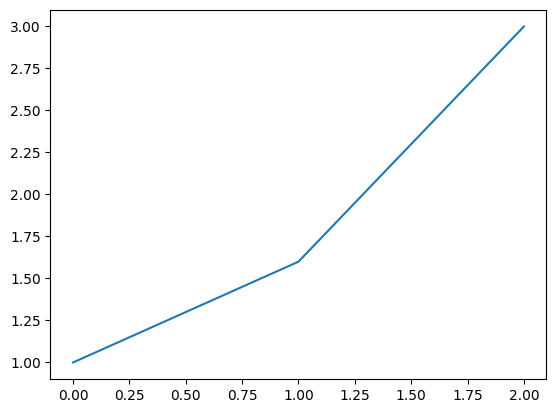

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,1.6,3])